In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [3]:
data = pd.read_csv('F:\kashipara\creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    199 non-null    int64  
 1   V1      199 non-null    float64
 2   V2      199 non-null    float64
 3   V3      199 non-null    float64
 4   V4      199 non-null    float64
 5   V5      199 non-null    float64
 6   V6      199 non-null    float64
 7   V7      199 non-null    float64
 8   V8      199 non-null    float64
 9   V9      199 non-null    float64
 10  V10     199 non-null    float64
 11  V11     199 non-null    float64
 12  V12     199 non-null    float64
 13  V13     199 non-null    float64
 14  V14     199 non-null    float64
 15  V15     199 non-null    float64
 16  V16     199 non-null    float64
 17  V17     199 non-null    float64
 18  V18     199 non-null    float64
 19  V19     199 non-null    float64
 20  V20     199 non-null    float64
 21  V21     199 non-null    float64
 22  V2

In [5]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

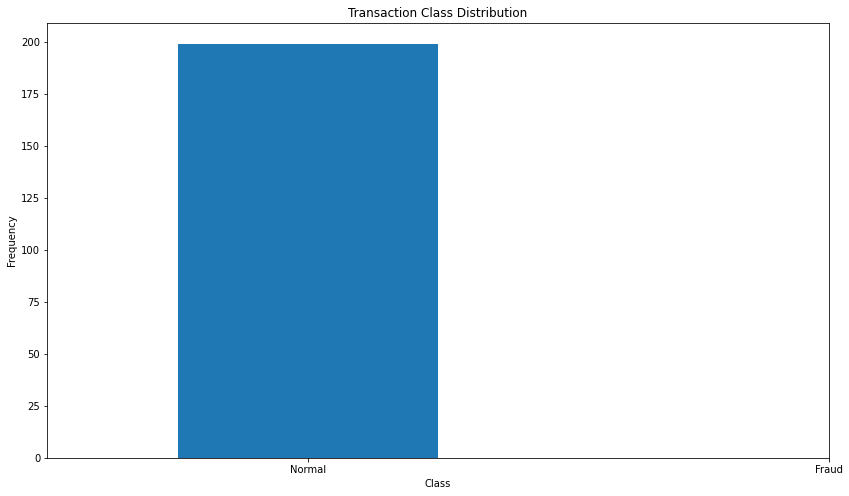

In [6]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [7]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [8]:
print(fraud.shape,normal.shape)

(0, 31) (199, 31)


In [9]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count     199.000000
mean       93.352714
std       321.084247
min         0.750000
25%         6.605000
50%        20.530000
75%        67.635000
max      3828.040000
Name: Amount, dtype: float64

In [11]:
normal.Amount.describe()

count     199.000000
mean       93.352714
std       321.084247
min         0.750000
25%         6.605000
50%        20.530000
75%        67.635000
max      3828.040000
Name: Amount, dtype: float64